### Getting historical data from a single UO sensor via REST API
We use Python programming language to access data for a single rainfall sensor with ID ‘PER_ENVIRONMENT_008062_EA_TPRG_WEAT’ for last year historical data. The code sample below can be modified to query any other UO sensor for arbitrary date range.

In [1]:
# load libraries
import requests     # HTTP library
import pandas as pd # data analysis library
import datetime     # module for manipulating dates and times
import seaborn as sns           # statistical visualization library
import matplotlib.pyplot as plt # plotting library

In [14]:
# Urban Observatory API endpoint
API_endpoint = "http://uoweb3.ncl.ac.uk/api/v1.1/sensors/{}/data/json/" 
# UO sensor ID
SENSOR_NAME = 'PER_ENVIRONMENT_008062_EA_TPRG_WEAT' 

In [21]:
# select a start date and end date for the queried data 
FROM_DATE = datetime.date(2022, 3, 1) # year, month, day 
TO_DATE = datetime.date(2022, 3, 18)

In [22]:
# format the HTTP request parameters
params = {'starttime': FROM_DATE.strftime('%Y%m%d'), 'endtime': TO_DATE.strftime('%Y%m%d')} 
api_url = API_endpoint.format(SENSOR_NAME)

In [23]:
# make the API call
# depending on the selected time range -- this request can take a while
response = requests.get(api_url, params=params) 
sensor_data = response.json()

In [24]:
# format the response to data frame and parse timestamp to human readable format 
rain_df = pd.DataFrame(sensor_data['sensors'][0]['data']['Rain'])
rain_df['ts'] = pd.to_datetime(rain_df['Timestamp']/1000, unit='s')

In [50]:
# get additional information about the sensor
print(sensor_data['sensors'][0].keys())

dict_keys(['Location (WKT)', 'Broker Name', 'data', 'Sensor Name', 'Third Party', 'Ground Height Above Sea Level', 'Sensor Centroid Longitude', 'Sensor Height Above Ground', 'Raw ID', 'Sensor Centroid Latitude'])


In [51]:
# get sensor location
print("lat, lon: ",
      sensor_data['sensors'][0]['Sensor Centroid Latitude']['0'],
      sensor_data['sensors'][0]['Sensor Centroid Longitude']['0'])

lat, lon:  55.132825 -1.538065


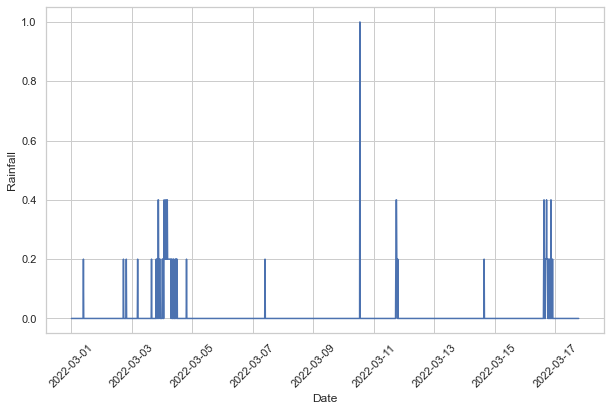

In [31]:
# plot the rain data
sns.set_style('whitegrid')
plt.gcf().set_size_inches(10, 6)
sns.lineplot(x='ts', y='Value', data=rain_df)
plt.ylabel('Rainfall (mm)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.show()

### List UO sensors by theme
Urban Observatory API can be used to query sensor names by themes
Available themes: 'People', 'Vehicles', 'Weather', 'Air Quality', 'Water Level', 'Bee Hive', 'Soil', 'Traffic', 'Building', 'Water Quality', 'Seismic', 'Sewage', 'Noise', 'Light', 'Electrical'

In [13]:
API_endpoint = "http://uoweb3.ncl.ac.uk/api/v1.1/sensors/json/"
query = {'theme':'Weather'} 
response = requests.get(API_endpoint, params=query)
theme_response = response.json()
sensor_names = [sensor['Sensor Name'] for sensor in theme_response['sensors']] 
print(f"Theme: {query['theme']} returned {len(theme_response['sensors'])} sensors")

# first five sensor names 
print('First five sensors: ', sensor_names[0:5])

Theme: Weather returned 611 sensors
First five sensors:  ['PER_AIRMON_MESH1903150', 'PER_AIRMON_MESH1757150', 'PER_AIRMON_MESH1960150', 'PER_AIRMON_MESH1977150', 'PER_AIRMON_MESH1918150']
